## This file is for average monthly temprature  ##

# for Cambridge, England #

In [1]:
import pandas as pd
import os 

In [2]:
os.chdir('Data')

In [3]:
ls

armaghdata.txt     dly1823.zip     info.txt        sheffielddata.txt
cambridgedata.txt  durhamdata.txt  oxforddata.txt


In [4]:
df = pd.read_csv('cambridgedata.txt', delim_whitespace=True, skiprows=5,on_bad_lines='skip')

df = df.drop(index=0).reset_index(drop=True)
df.info()


df = df.apply(pd.to_numeric,errors='coerce') 
df.columns

old_names = ['yyyy', 'mm', 'tmax', 'tmin'] 
new_names = ['year', 'month', 'maxt', 'mint']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

req_col = ['date', 'maxt', 'mint']
df = df[req_col]

df = df.dropna().reset_index(drop=True)
############

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   yyyy    780 non-null    object
 1   mm      780 non-null    object
 2   tmax    780 non-null    object
 3   tmin    780 non-null    object
 4   af      780 non-null    object
 5   rain    780 non-null    object
 6   sun     780 non-null    object
dtypes: object(7)
memory usage: 42.8+ KB


/tmp/ipykernel_290/169274071.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('cambridgedata.txt', delim_whitespace=True, skiprows=5,on_bad_lines='skip')


In [5]:
!pip install matplotlib==3.10.0 # install matplotlib

1963-01-01


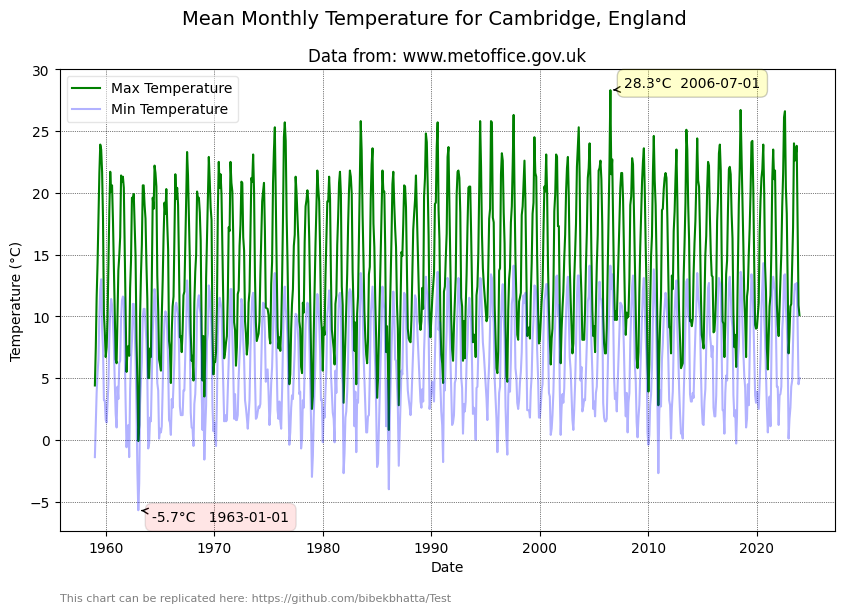

In [6]:
import matplotlib.pyplot as plt
# import numpy as np

plt.style.use('default')

# Find the highest temperature and its index
max_temp = df['maxt'].max()
max_temp_idx = df['maxt'].idxmax()
max_temp_date = df['date'][max_temp_idx]
max_temp_date_str = str(max_temp_date)[:10]

min_temp = df['mint'].min()
min_temp_idx = df['mint'].idxmin()
min_temp_date = df['date'][min_temp_idx]
print(str(min_temp_date)[:10])
min_temp_date_str = str(min_temp_date)[:10]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['maxt'], label='Max Temperature', color='green')
plt.plot(df['date'], df['mint'], label='Min Temperature', color='blue', alpha=0.3)

# Add annotation for highest temperature
plt.annotate(f'{max_temp}°C  {max_temp_date_str}', 
            xy=(max_temp_date, max_temp),
            xytext=(10, 0),  # 10 points offset
            textcoords='offset points',
            ha='left',
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))


# Add annotation for lowest temperature
plt.annotate(f'{min_temp}°C   {min_temp_date_str}', 
            xy=(min_temp_date, min_temp),
            xytext=(10, 0),
            textcoords='offset points',
            ha='left',
            va='top',
            bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.suptitle('Mean Monthly Temperature for Cambridge, England', fontsize=14) 
plt.title('Data from: www.metoffice.gov.uk')
plt.text(plt.gca().get_xlim()[0], plt.gca().get_ylim()[0] - 5, 
         'This chart can be replicated here: https://github.com/bibekbhatta/Test', 
         fontsize=8, ha='left', va='top', alpha=0.5)
plt.legend(loc='upper left', framealpha = 0.5)
plt.grid(True, which='both', linestyle=':', color='black', linewidth=0.5)
plt.show()